In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

In [4]:
flatdata_adjusted=pd.read_csv('flatdata_adjusted.csv')

In [8]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [9]:
flatdata_adjusted_year=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0]
flatdata_adjusted_year

,BriefDescription,ProjectYear,InternalProjectID,ImprovementType,AreaTypeFuncClass,main_ProjectInformation.State,TollType,TrafficForecast,ForecastYear,ForecastYearType,...,Count,Station_Identifier,main_TrafficCounts.State,CounterID,FunctionalClass,AdjustedForecast,Error,PercentError,AbsPE,DiffYear
0,NaN,2006.0,2320,12,3.0,WI,No Tolls on 1+ lane,34000,2007,1,...,31500,401399.0,Wisconsin,58-22417-401399,3,34000.0,2500.0,7.352941,7.352941,1.0
1,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,30000,2011,1,...,22200,404512.0,Wisconsin,58-22419-404512,3,30000.0,7800.0,26.000000,26.000000,4.0
2,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,19000,2011,1,...,20100,404513.0,Wisconsin,58-22421-404513,3,19000.0,-1100.0,-5.789474,5.789474,4.0
3,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,21900,2011,1,...,18400,404524.0,Wisconsin,58-22423-404524,4,21900.0,3500.0,15.981735,15.981735,4.0
4,NaN,2006.0,2322,12,3.0,WI,No Tolls on 1+ lane,22700,2009,1,...,22600,401843.0,Wisconsin,58-22425-401843,3,22700.0,100.0,0.440529,0.440529,3.0
5,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,2800,2011,1,...,2500,404541.0,Wisconsin,58-22427-404541,5,2800.0,300.0,10.714286,10.714286,4.0
6,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,33500,2011,1,...,33500,404545.0,Wisconsin,58-22429-404545,3,33500.0,0.0,0.000000,0.000000,4.0
7,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,1500,2011,1,...,2200,404547.0,Wisconsin,58-22431-404547,7,1500.0,-700.0,-46.666667,46.666667,4.0
8,NaN,2007.0,2467,12,3.0,WI,No Tolls on 1+ lane,23800,2011,1,...,25400,404548.0,Wisconsin,58-22433-404548,3,23800.0,-1600.0,-6.722689,6.722689,4.0
9,NaN,2006.0,2373,12,1.0,WI,No Tolls on 1+ lane,8600,2008,1,...,6600,510108.0,Wisconsin,58-22435-510108,3,8600.0,2000.0,23.255814,23.255814,2.0


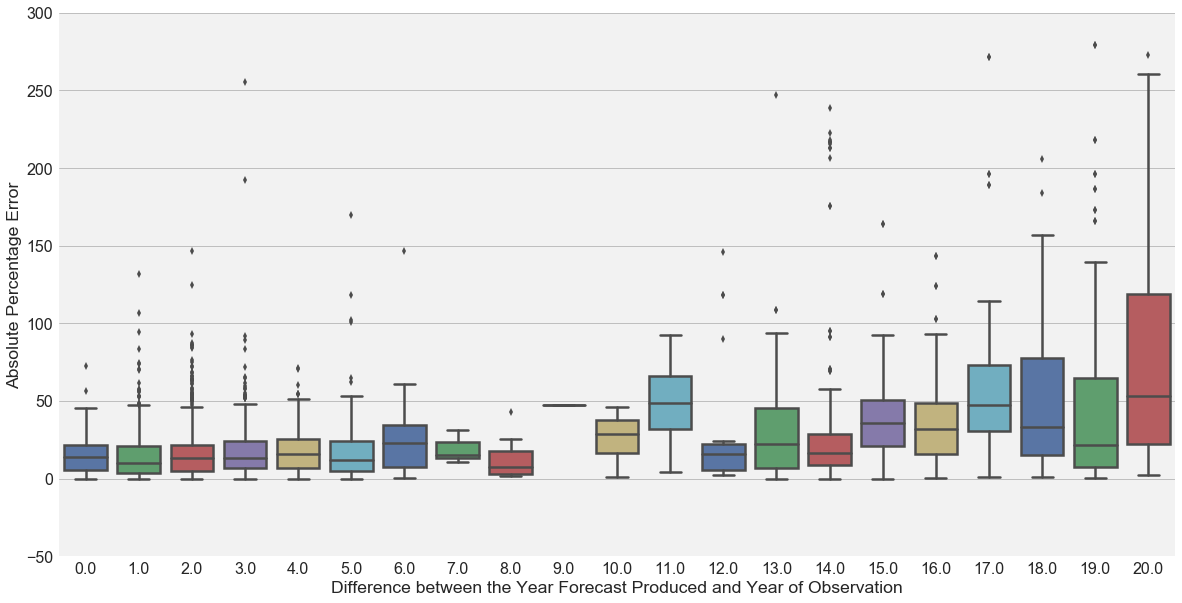

In [34]:
#sns.despine(offset=50, trim=True)
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.boxplot(flatdata_adjusted_year['DiffYear'],flatdata_adjusted_year['AbsPE'],palette='deep')
ax.figure.set_size_inches(20,10)
ax.set_xlim(-0.5
            ,20.5)
ax.set_ylim(-50,300)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Difference between the Year Forecast Produced and Year of Observation')
ax.set_ylabel('Absolute Percentage Error')
#ax.set_facecolor(axis_bgcolor)
ax.figure.savefig('boxplotyear.png')

(5000, 100000)

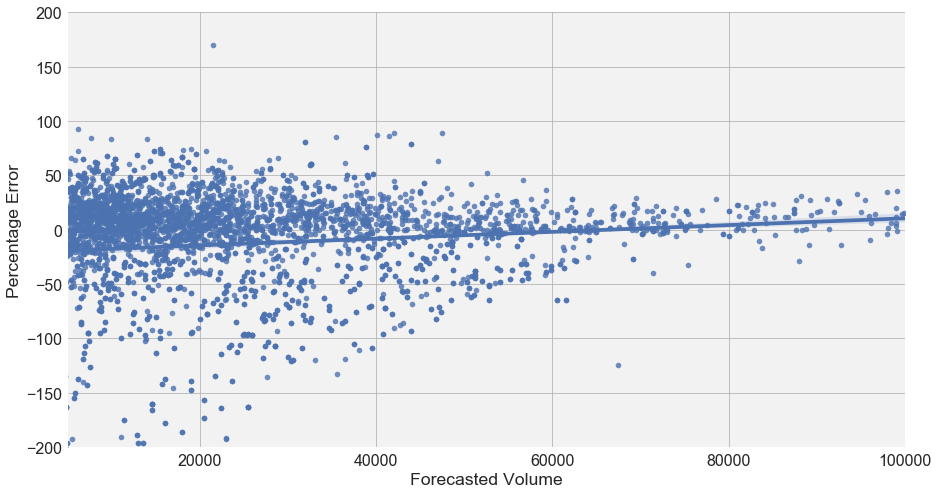

In [44]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['PercentError'])
ax.figure.set_size_inches(20,10)
#ax.set_xlim(0
#            ,100000)
ax.set_ylim(-200,200)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
ax.figure.savefig('scatterplotPE.png')

ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,100000)

#ax.set_ylim(0,500)

(-50, 200)

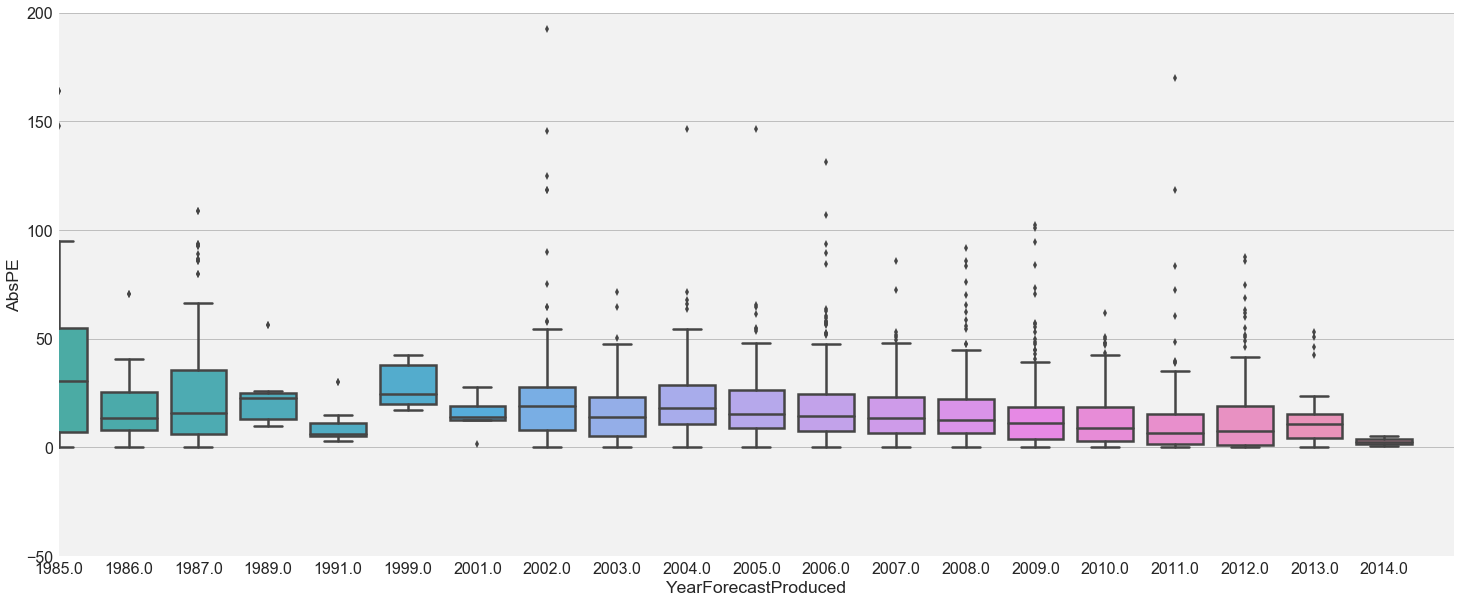

In [56]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7','xtick.direction': u'out'})
ax=sns.boxplot(flatdata_adjusted_year['YearForecastProduced'],flatdata_adjusted_year['AbsPE'])
ax.figure.set_size_inches(25,10)
ax.set_xlim(20,40)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
ax.set_ylim(-50,200)
#ax.figure.savefig('boxplotyearforecastproduced.png')

In [55]:
ax.set_xticks?